In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [3]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.shape
# 15 columns (features) and 32561 rows (records)

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
unique_inc_classes=df["income"].unique()
unique_inc_classes

array(['<=50K', '>50K'], dtype=object)

# Histograms to analyze frequency and distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education.num'}>,
        <Axes: title={'center': 'capital.gain'}>],
       [<Axes: title={'center': 'capital.loss'}>,
        <Axes: title={'center': 'hours.per.week'}>]], dtype=object)

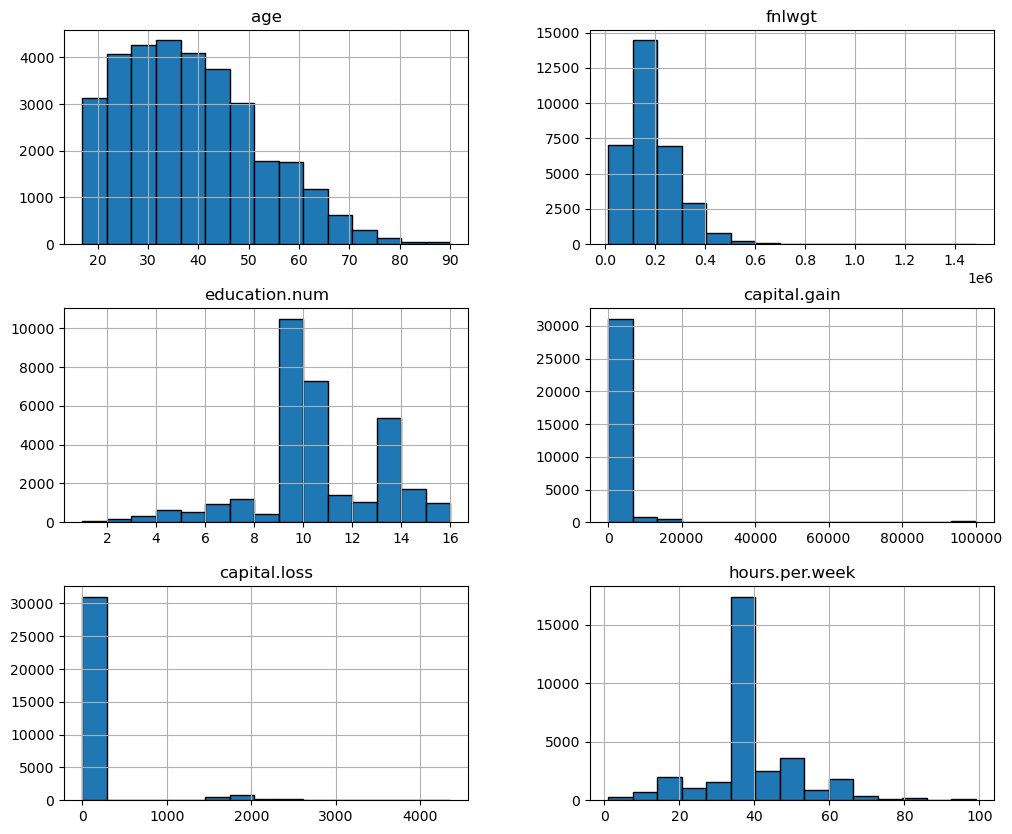

In [8]:
df.hist(figsize=(12, 10), bins=15, edgecolor='black')
# Histograms for numerical features

# Analysis
For capital gain and capital loss, the distribution is extremely skewed with most values being close to zero indicating no realized real-estate/stock market gains and outliers suggesting wealth disparities.

Educational-num here represents the years of education taken. It can be seen that more entries are in (9-11) Years meaning highschool level of education with lesser frequency of people with no education.

Age distribution has maximum frequency between 30 to 40 as average was around 38 as seen before

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


We can see there are some missing values here represented by a ?. We will need to handle these values. For convenience, we should replace the ? with the null values (NaN)

In [15]:
df.replace('?', np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [21]:
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_counts=missing_counts[missing_counts>0]
print(missing_counts)
missing_percent = missing_percent[missing_percent>0]
print(missing_percent)

workclass         1836
occupation        1843
native.country     583
dtype: int64
workclass         5.638647
occupation        5.660146
native.country    1.790486
dtype: float64


# We have found these columns with this much % of missing values. Ideally we can either drop them or do imputation.

In [29]:
#Ideally we can replace these by mode of these columns since they are all categorical variables
df["workclass"].fillna(df["workclass"].mode()[0],inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0],inplace=True)
df["native.country"].fillna(df["native.country"].mode()[0],inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [30]:
missing_counts = df.isna().sum()
# Missing values are now removed
missing_counts

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

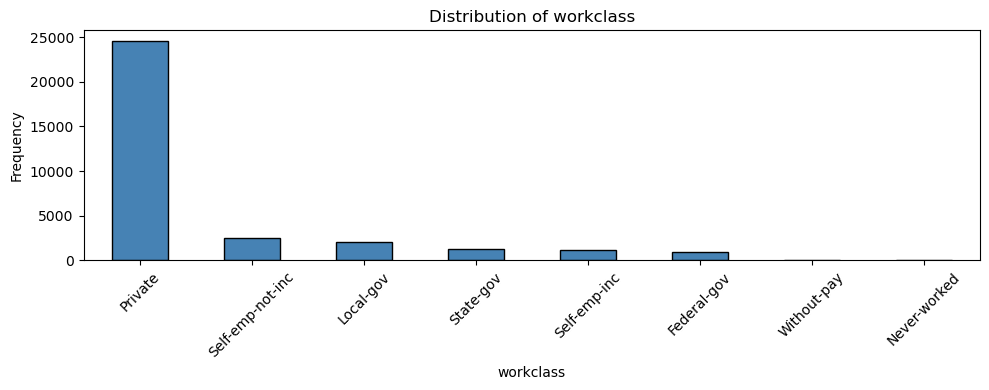

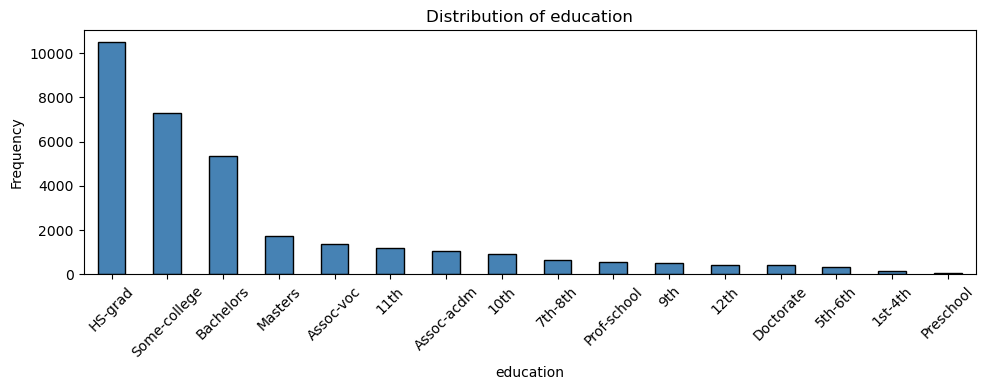

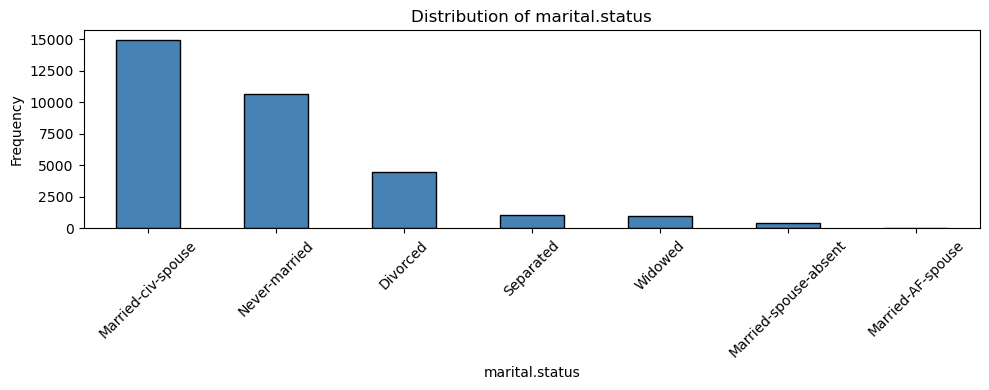

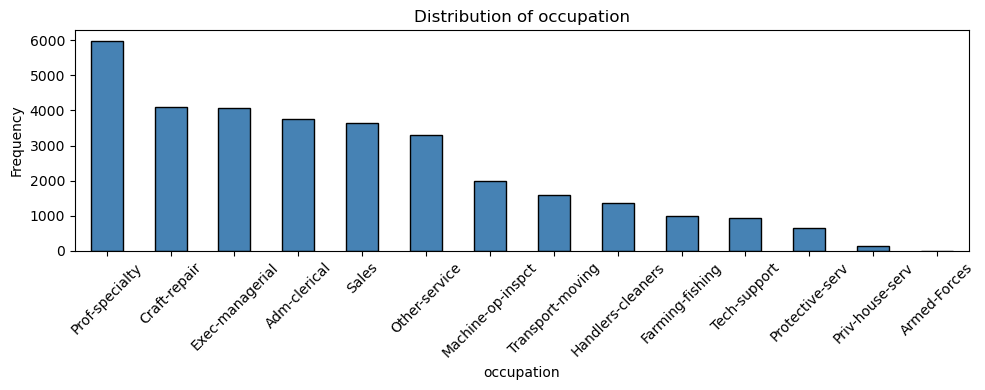

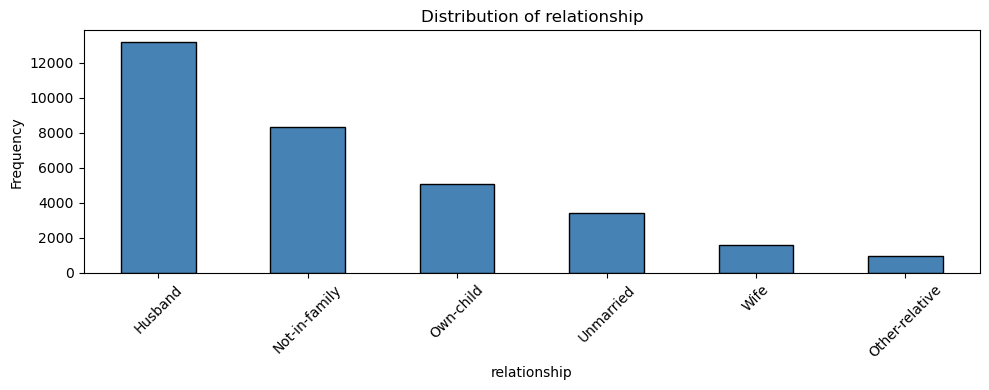

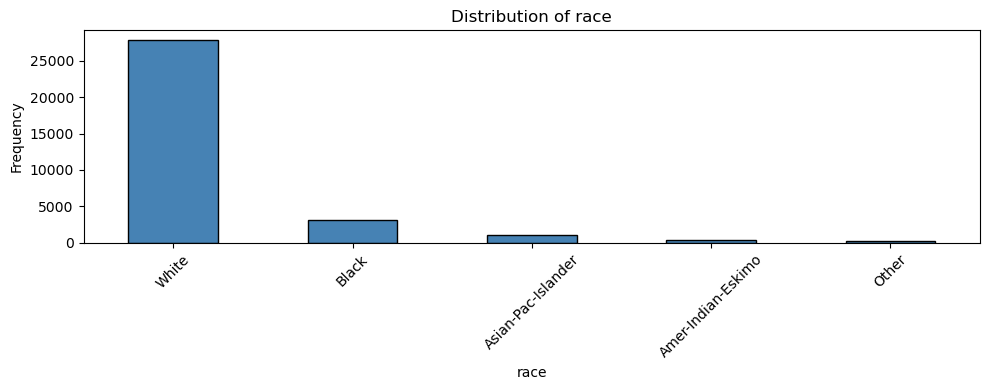

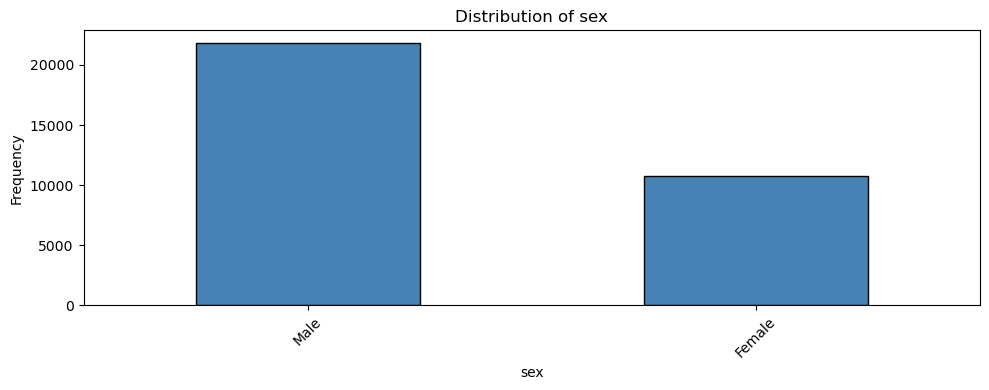

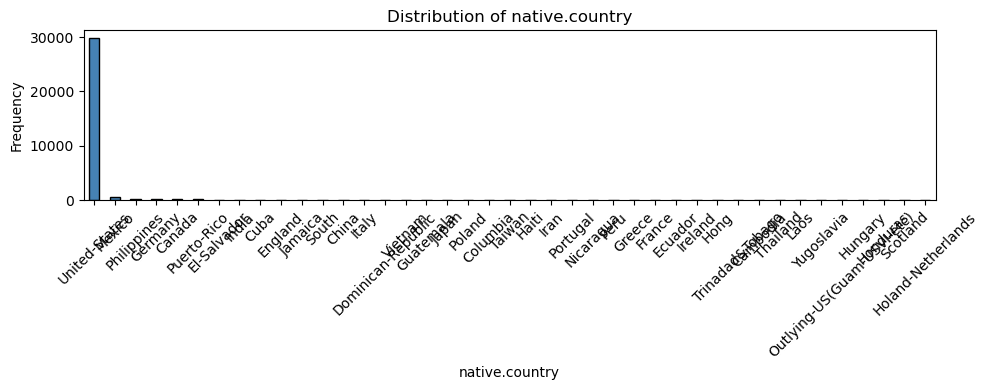

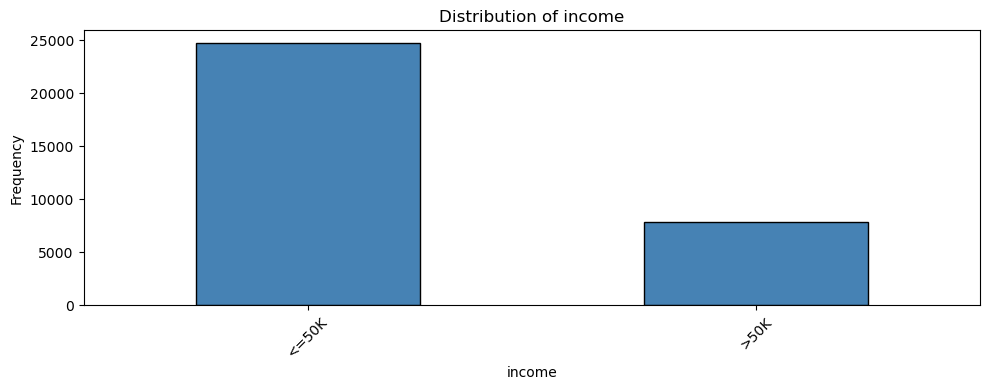

In [37]:
# we will need univariate analysis to check distribution for categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Generate bar charts for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind='bar', color='steelblue', edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analysis
HS-grad being the education level with most frequency is consistent with what we analysed earlier, We can analyze Race and sex distributions as Male and White are the ones with the most frequency (by a large margin) also this consensus is based almost entirely in USA ( seen from native country ), and the distribution of work class is mainly private(corporate)

# Handling duplicate values

In [40]:
df.duplicated().sum()
# Number of duplicate values

24

In [42]:
df.drop_duplicates(inplace=True)
df.shape

(32537, 15)

# Handling Outliers

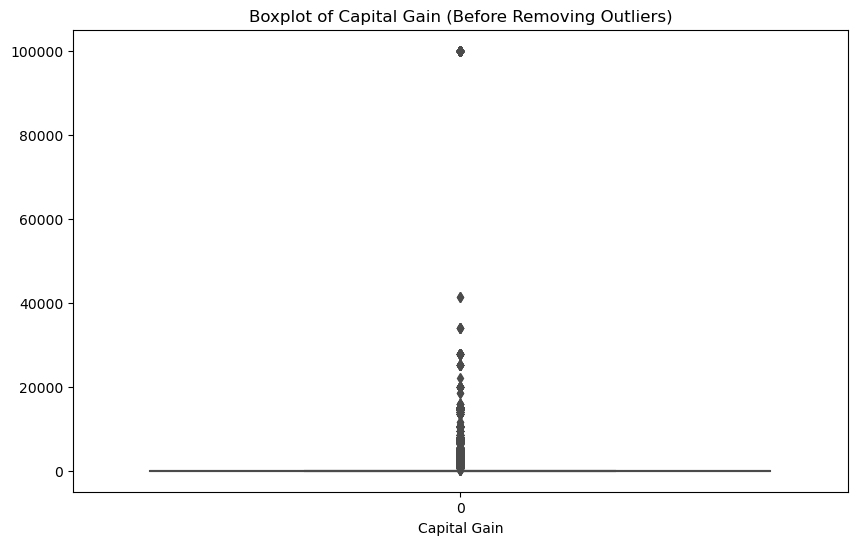

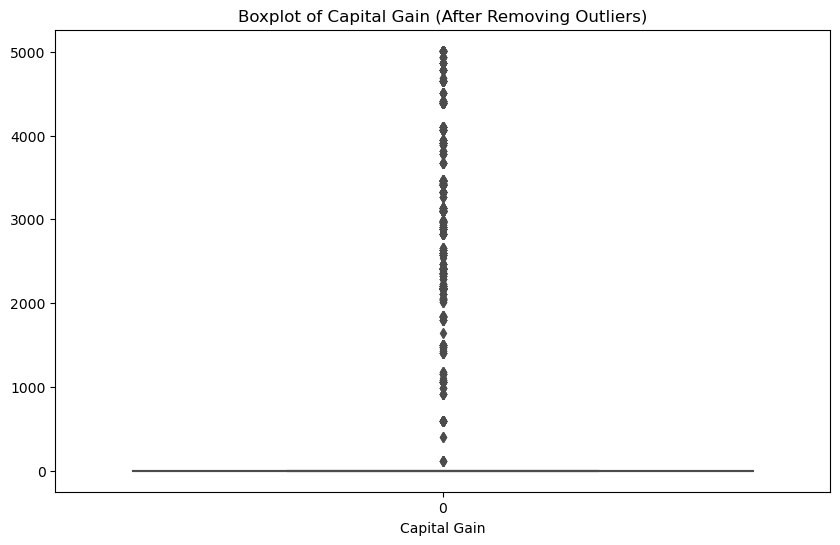

(30958, 15)

In [48]:
import seaborn as sns
# Boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['capital.gain'], color='steelblue')
plt.title('Boxplot of Capital Gain (Before Removing Outliers)')
plt.xlabel('Capital Gain')
plt.show()

# Remove outliers above the 95th percentile
q95 = df['capital.gain'].quantile(0.95)
df_filtered = df[df['capital.gain'] <= q95]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df_filtered['capital.gain'], color='orange')
plt.title('Boxplot of Capital Gain (After Removing Outliers)')
plt.xlabel('Capital Gain')
plt.show()

df_filtered.shape

# Bivariate Analysis

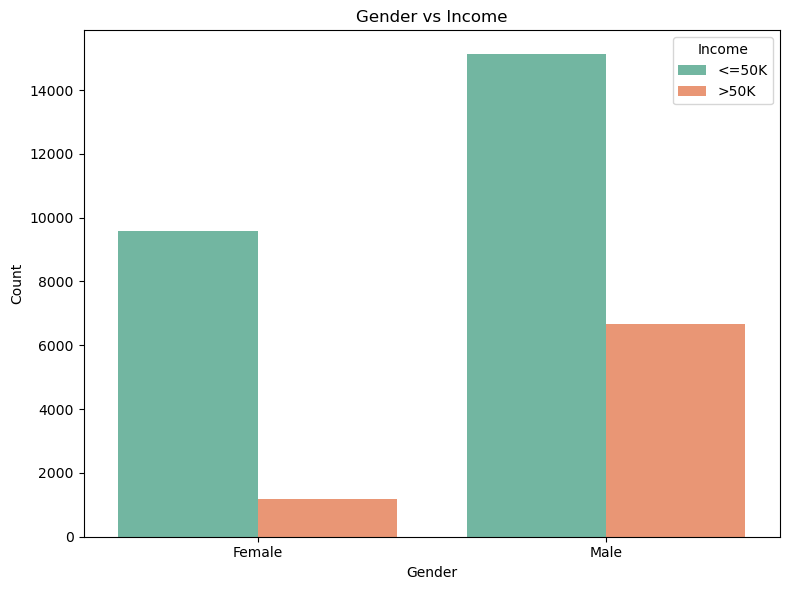

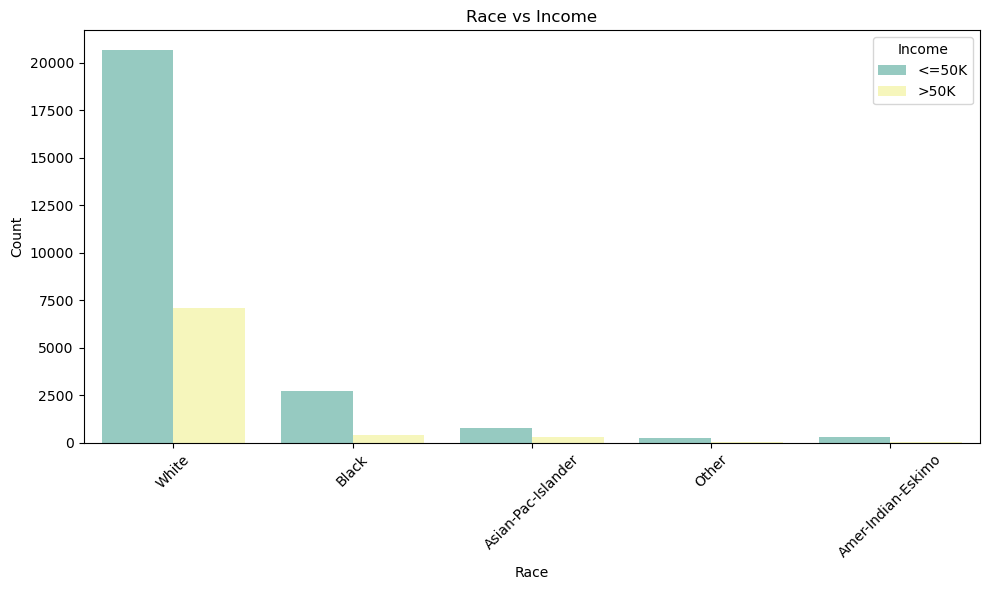

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='income', palette='Set2')
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income', palette='Set3')
plt.title('Race vs Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can conclude certain Gender Pay Gaps between Races and Genders

In [52]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\dhruv\AppData\Local\Temp\ipykernel_28488\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


Here, we can see that Age has a positive correlation with education,num, capital.gain, hours.per.week

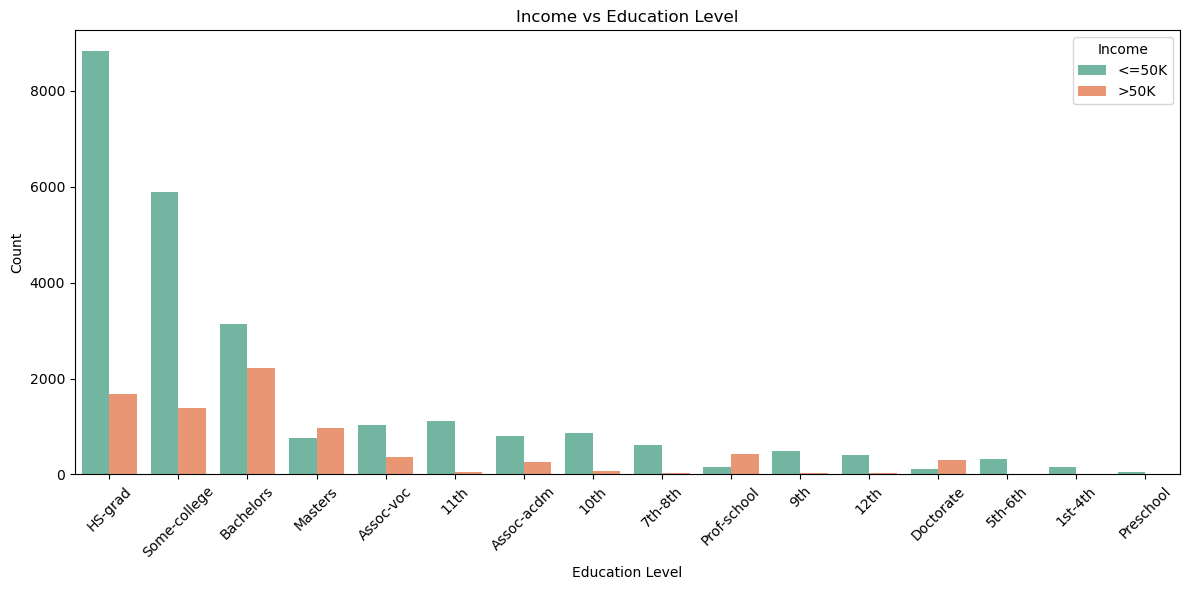

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', palette='Set2',
              order=df['education'].value_counts().index)  # Order by frequency of education levels
plt.title('Income vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

 Here, we can conclude that people with higher educations tend to have a better income as ratio of >50k income to <=50k increases

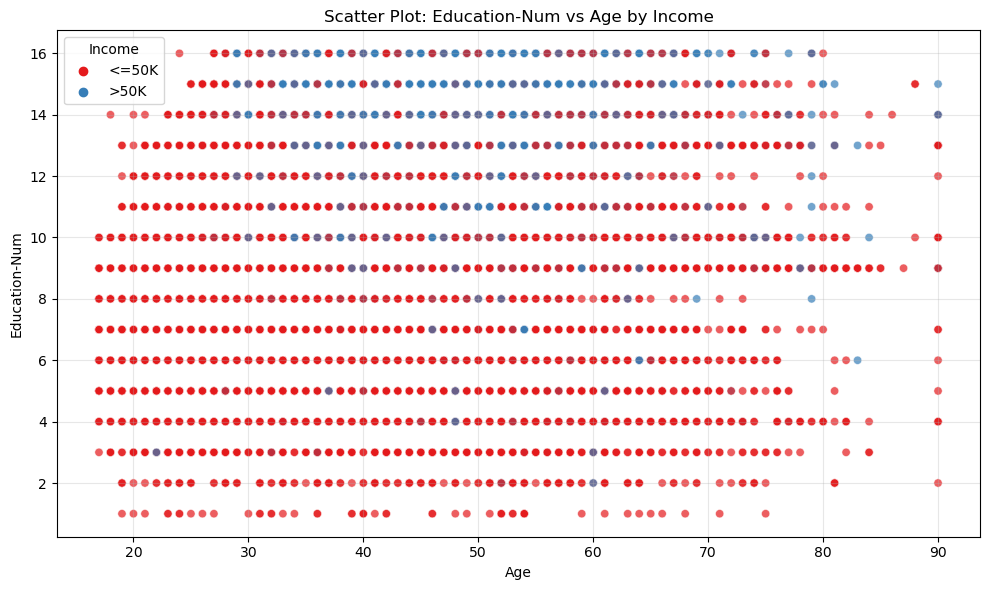

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='education.num', hue='income', palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Education-Num vs Age by Income')
plt.xlabel('Age')
plt.ylabel('Education-Num')
plt.legend(title='Income')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 Here, its visible that people with higher education do have better chances of having income >50k

# Multivariate Analysis

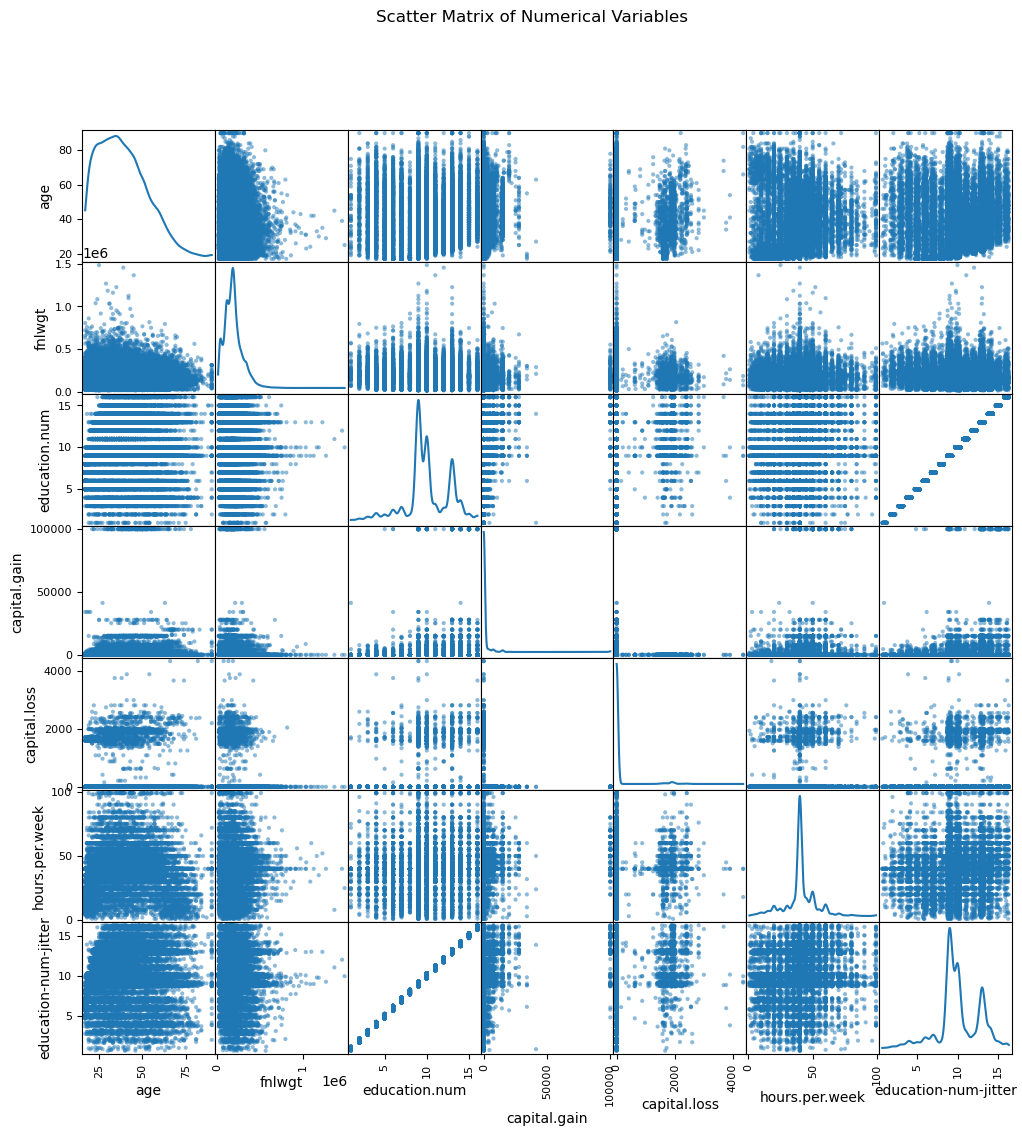

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12, 12), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Variables')
plt.show()

The diagonal entries here just represent the frequency distribution of features. 

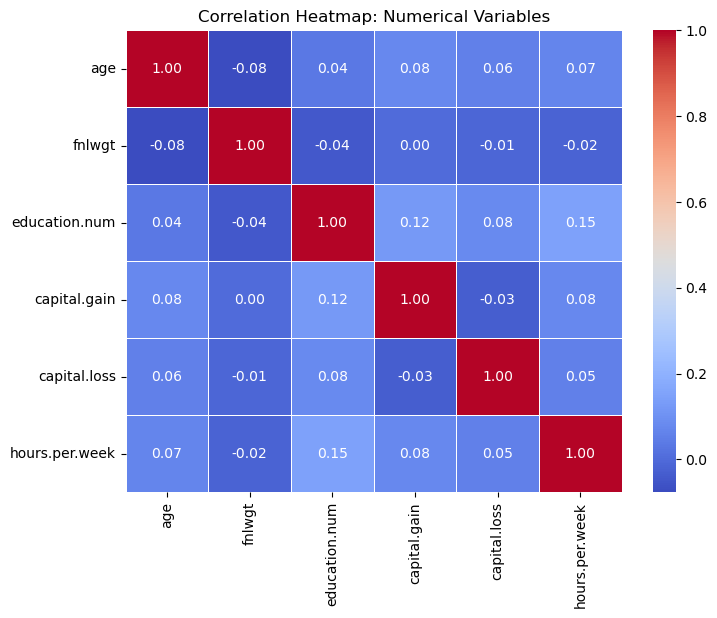

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Numerical Variables')
plt.show()